# TP Coding Convolutional Neural Networks in keras :

# Creating the CNN model in Keras using the Sequential API

You have probably noticed that the Tensorflow interface, while simpler than coding a complex neural network by hand, is nevertheless somewhat laborious to use; all the variables have to be specifically created, we have to create a session etc. Luckily, a package was created which acts as a layer above Tensorflow (and other packages) to simplify the coding process. This package is called Keras.

We are now going to create the same network as in part 1 of the TP with Keras. Hopefully you will see that the interfance is quite simplified in comparison to that of Tensorflow.

Here is a summary of the network again

- The input of the CNN is a set of (m,n,3) image tensors (m and n depend on the dataset).
- We apply 
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)

### Your task:
You need to add the missing parts in the code (parts between # --- START CODE HERE and # --- END CODE HERE)



Keras has a simple way of adding layers to create a neural network. First, you can indicate to Keras that the model is 'sequential', that is to say, a straight-forward CNN. For this, you can use the following function :
- ```model = Sequential()```

After this, you can add layers with the function.

- ```model.add()```

You can then use the ```Conv2D```, ```Activation```, ```MaxPooling2D```, ```Flatten``` and ```Dense``` (fully connected) functions to specify different layer types. You will have to specify the parameters of these functions to create the network architecture. To find these parameters, use the Keras documentation, for example in the case of convolutional layers :

https://keras.io/layers/convolutional/


## We first import some keras packages

In [0]:
%matplotlib inline
%tensorflow_version 1.x
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
print(keras.__version__)

TensorFlow 1.x selected.


Using TensorFlow backend.


2.3.1


## Define the model parameters again

In [0]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)
# re-define the input shapes
input_shape = (32, 32, 3)
nb_classes = 10

## Import the CIFAR10 dataset

In [0]:
## Import the CIFAR10 data and carry out some pre-processing
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# input image dimensions
img_rows, img_cols, nb_channels = X_train.shape[1], X_train.shape[2], X_train.shape[3]

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)


# the CIFAR10 categories
cifar_10_list = [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#modify the number of input channels 
n_h_0 = nb_channels
# add more epochs
n_epochs = 30


170500096/170498071 [==============================] - 13s 0us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
There is 50000 train data
There is 10000 test data
32 32 3


In [0]:
# clip data

max_data = 10000
X_train = X_train[0:max_data,:,:,:]
X_test =  X_test[0:max_data,:,:,:]
Y_train = Y_train[0:max_data,:]
Y_test =  Y_test[0:max_data,:]
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (10000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
Y_train shape: (10000, 10)


## Create the CNN now with the network parameters specified above, using the Sequential() API of Keras

In [0]:
Dense?

In [0]:
# --- START CODE HERE
model = Sequential()
model.add(Conv2D(32, input_shape =  (3,3),strides= (1,1),activation= 'relu',padding ='same',use_bias = True))
model.add(Conv2D(32, (3,3),strides= (1,1),activation= 'relu',padding ='same', use_bias = True))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(32, (3,3),strides= (1,1),activation= 'relu',padding ='same', use_bias = True))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(512,activation= 'relu', use_bias = True))
model.add(Dense(nb_classes,activation = 'softmax', use_bias = True))


# --- END CODE HERE

## Compile the model

This has created the computational graph correspoding to the network. However, we also need to define the ```loss``` that we will minimize and the ```optimizer``` (the specific algorithm used to perform gradient descent). This can be done with the following simple syntax :

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

## Summary of the network

Keras has an extremely useful function ```summary()``` which summarises the network you have created in a viewer-friendly manner :

In [0]:
model.summary()

ValueError: ignored

## Perform the training

The training can be carried out with an extremely simple syntax :

In [0]:
model.fit(X_train, Y_train,
          batch_size=batch_size, 
          epochs=n_epochs,
          verbose=1, 
          validation_data=(X_test, Y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 2s 204us/step - loss: 2.2451 - accuracy: 0.1980 - val_loss: 1.9865 - val_accuracy: 0.2863
Epoch 2/30
10000/10000 [==============================] - 2s 167us/step - loss: 1.9347 - accuracy: 0.2926 - val_loss: 1.8686 - val_accuracy: 0.3300
Epoch 3/30
10000/10000 [==============================] - 2s 171us/step - loss: 1.7530 - accuracy: 0.3596 - val_loss: 1.7543 - val_accuracy: 0.3649
Epoch 4/30
10000/10000 [==============================] - 2s 174us/step - loss: 1.6189 - accuracy: 0.4077 - val_loss: 1.6299 - val_accuracy: 0.4132
Epoch 5/30
10000/10000 [==============================] - 2s 176us/step - loss: 1.5482 - accuracy: 0.4383 - val_loss: 1.5885 - val_accuracy: 0.4223
Epoch 6/30
10000/10000 [==============================] - 2s 164us/step - loss: 1.4892 - accuracy: 0.4647 - val_loss: 1.6088 - val_accuracy: 0.4149
Epoch 7/30
10000/10000 [==============================] - 2s 1

Sometimes it yields good results and sometimes not. It's somehow unpredictable.

## We evaluate the performances of the model on the test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 3.087216375732422
Test accuracy: 0.4018000066280365


Let's take a look at what the network has learned. What do you think ?

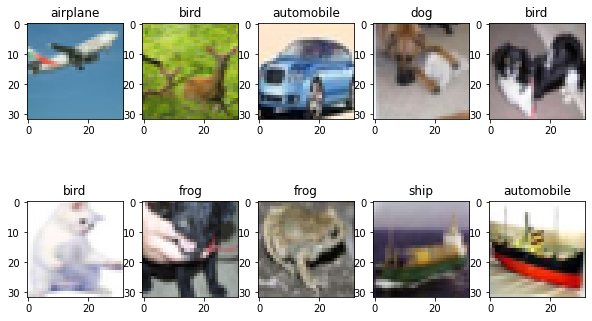

In [0]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    predicted_class = np.argmax(np.squeeze(model.predict(np.expand_dims(X_test[rand_ind,:,:,:],axis=0))))
    plt.imshow(X_test[rand_ind,:,:,:])
    plt.title(cifar_10_list[int(predicted_class)])

## Exploring the model in greater detail :

More generally, you can explore the network quite easily with the Keras package by accessing the different variables and functions of the model with the ```dir``` function :

In [0]:
dir(model)

In [0]:
dir(model.layers[0])

## Viewing the filters
Now, display all (32) trained filters of the first layer

32
(3, 3)
(3, 3, 3, 32)


<Figure size 720x432 with 0 Axes>

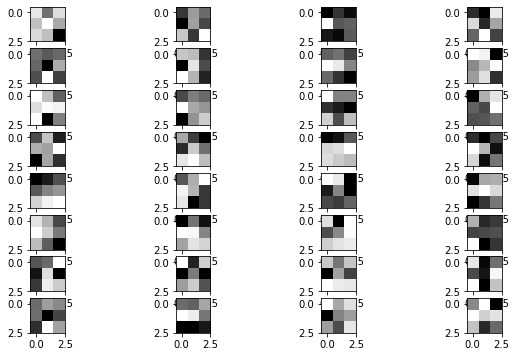

In [0]:
print(model.layers[0].filters)
print(model.layers[0].kernel_size)
print(model.layers[0].get_weights()[0].shape)


plt.figure(figsize=(10, 6))
##Model weights
weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 6))
for num in range(0,32):
    plt.subplot(8, 4, num+1)
    # --- START CODE HERE
    for i in range(3):
      for j in range(3):
        plt.imshow(weights[:,:,0,num],cmap = 'gray')#showing just for the first channel
    # --- END CODE HERE    

You can see that this is not very informative; it is difficult to interpret these weights. We therefore need more sophisticated techniques when analysing CNNs. To see some of these techniques, go on to part 3.